
# Project: Nobel Prize Winners data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 This dataset shows all Nobel Prize Laureates from the award's inception in 1901 through current day (October 2016). Laureates are announced at the beginning of October and a ceremony is held on December 10 each year. The Nobel Prize was established in 1895 by Swedish inventor Alfred Nobel and first awarded in 1901. It recognizes people in the fields of Physics, Chemistry, Physiology or Medicine, Literature, Peace, and Economics.. 
 questions:
 
### Is the prize category differ from a country and year to anther

### Is there a big difference in the gender of winners

 
 in this analysis , we will discover the data of Nobel Prize Winners:
 the gender of winners
 country of winners
 prize category
 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

### first, loading data, 
cheking messing and duplicated values


In [4]:
df = pd.read_csv('nobel_prize_by_winner.csv')

df.head()


,index,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,...,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,...,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,...,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,...,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,...,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,...,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 21 columns):
index                864 non-null int64
id                   864 non-null int64
firstname            858 non-null object
surname              829 non-null object
born                 839 non-null object
died                 839 non-null object
bornCountry          833 non-null object
bornCountryCode      833 non-null object
bornCity             831 non-null object
diedCountry          529 non-null object
diedCountryCode      528 non-null object
diedCity             524 non-null object
gender               864 non-null object
year                 858 non-null float64
category             858 non-null object
overallMotivation    14 non-null object
share                858 non-null float64
motivation           778 non-null object
name                 645 non-null object
city                 641 non-null object
country              641 non-null object
dtypes: float64(2), int64(2), objec

In [6]:
sum(df.duplicated())

0

In [7]:
df.shape

(864, 21)





### Data Cleaning

### deleting columns , i'm not going to use it!

In [8]:
df.drop(['overallMotivation','name','index','born', 'bornCountry','share', 'diedCountry','diedCountryCode', 'diedCity','bornCountryCode','died','motivation','bornCity', 'id','city'], axis=1 , inplace=True)

df.head()

,firstname,surname,gender,year,category,country
0,Elinor,Ostrom,female,2009.0,economics,USA
1,Elinor,Ostrom,female,2009.0,economics,USA
2,Wangari Muta,Maathai,female,2004.0,peace,NaN
3,Dorothy Crowfoot,Hodgkin,female,1964.0,chemistry,United Kingdom
4,Youyou,Tu,female,2015.0,medicine,China


### i'll delete all NaN values! 

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 779
Data columns (total 6 columns):
firstname    641 non-null object
surname      641 non-null object
gender       641 non-null object
year         641 non-null float64
category     641 non-null object
country      641 non-null object
dtypes: float64(1), object(5)
memory usage: 22.5+ KB


Start to visualize with matplotlib....

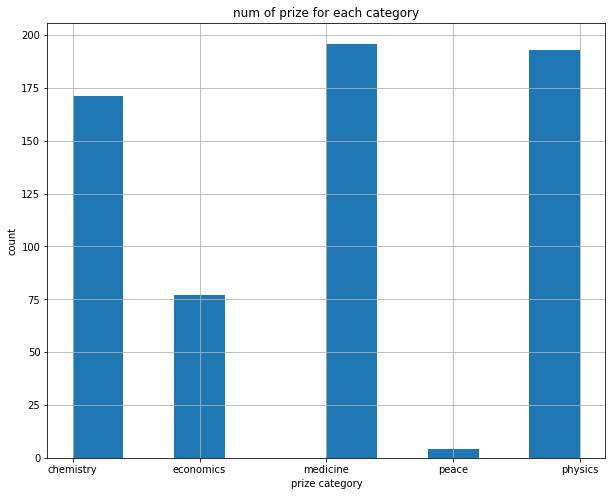

In [11]:
df.category.hist(figsize=(10,8));
plt.xlabel('prize category');
plt.ylabel('count');
plt.title('num of prize for each category');


### as we see most of the prizes go to medicine ,chemistry and physics ,
   and peace upon peace prizes.....

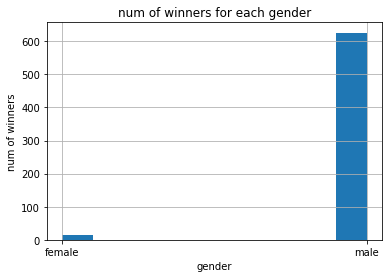

In [12]:
df.gender.hist();
plt.xlabel('gender');
plt.ylabel('num of winners');
plt.title('num of winners for each gender');

### this hist must be kidding ?!

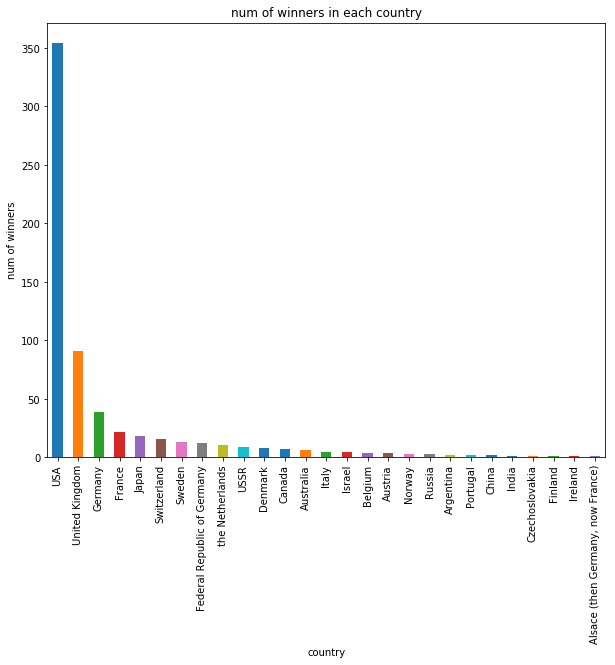

In [13]:
df.groupby('country').size().sort_values(ascending=False).plot(kind='bar',figsize=(10,8));
plt.ylabel('num of winners');
plt.title('num of winners in each country');

### not surprised to see USA on the top!

<a id='eda'></a>
## Exploratory Data Analysis


### Is there a big difference in the gender of winners:
#### here we'll calculate the number of womens and men who won the prize , 
and their category

In [14]:
fem = df.gender == "female"
mal = df.gender == "male"

In [15]:
df.gender.value_counts()

male      626
female     15
Name: gender, dtype: int64

In [16]:
df.groupby('gender')['category'].value_counts()

gender  category 
female  medicine       9
        chemistry      3
        economics      2
        physics        1
male    physics      192
        medicine     187
        chemistry    168
        economics     75
        peace          4
Name: category, dtype: int64

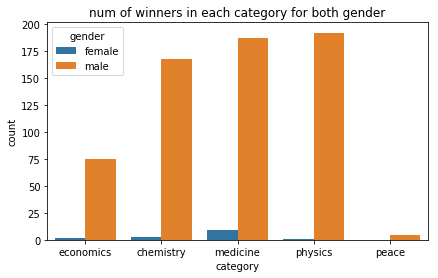

In [17]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot('category',hue='gender',data=df);
plt.title('num of winners in each category for both gender');

### :Is the prize category differ from a country and year to anther:

In [18]:
df.groupby("category")['country'].value_counts()

category   country                          
chemistry  USA                                   78
           United Kingdom                        28
           Germany                               22
           France                                 8
           Japan                                  5
           Switzerland                            5
           Federal Republic of Germany            4
           Israel                                 4
           Sweden                                 4
           Canada                                 3
           Argentina                              1
           Austria                                1
           Belgium                                1
           Czechoslovakia                         1
           Denmark                                1
           Finland                                1
           Italy                                  1
           Norway                                 1
           USSR    

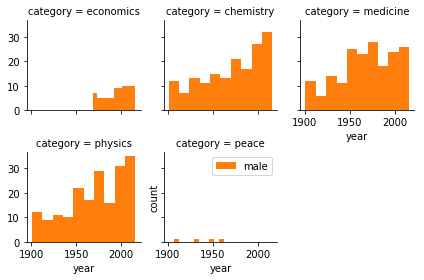

In [19]:
g = sns.FacetGrid(df, col="category", col_wrap=3,hue="gender", size=2 );
g.map(plt.hist, "year");
plt.ylabel('count');
plt.legend();


<a id='conclusions'></a>
## Conclusions



### well ! there's a gap between women and men who won the Nobel prize
from 641 winners there's only 15 women

### alors! all of the categories, USA is on the top
also most of them increase by the time except the peace prize

#### limitations: first of all , the data is limited on usa, i wanted my analysis to cover the whole world , and include the winner's age ,country and their category , like a case study on the winners background but most of them were from usa...

## reference:
https://www.kaggle.com/yamqwe/nobel-prize-winnerse